# Women Clothing E-Commerce NLP Case Study

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing Dataset:

In [2]:
# data = pd.read_excel('/content/drive/MyDrive/Data Science/Machine Learning/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform_/Womens Clothing Reviews Data.xlsx')
!pip install openpyxl
git_link = 'https://github.com/devan-b46/ml-case-studies-temp/raw/929dcb433e6586be8d78e03abc1cb6ff432a05fa/15.%20Capstone%20Case%20Study%20-%20NLP-%20Woman%20Clothing%20E-Commerce%20Platform_/Womens%20Clothing%20Reviews%20Data.xlsx'

data = pd.read_excel(git_link)
data.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.8 MB/s eta 0:00:00


,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


## Exploratory Data Analysis (EDA):



### Data Cleaning:

In [4]:
# 1. Checking and handling missing data, can be done using Imputation or Removal.

# # Here, we will fill missing values in the 'Customer Age' column with the mean age.
# data['Customer Age'].fillna(data['Customer Age'].mean(), inplace=True)



# # 2. Check for duplicates and remove them if necessary
# # Use the .duplicated() and .drop_duplicates() functions to identify and remove duplicates.
# data.duplicated(subset=['Product ID', 'Review Text'], keep='first')
# data.drop_duplicates(subset=['Product ID', 'Review Text'], keep='first', inplace=True)



# # 3. Ensure data types are consistent
# # Check and convert data types as needed.
# # For example, you might want to convert 'Customer Age' to integer if it's currently a float.
# data['Customer Age'] = data['Customer Age'].astype(int)



# # 4. Converting the provided text data into lowercase, for consistent performance:
# # Use the .str.lower() function to convert text to lowercase.
# data['Review Title'] = data['Review Title'].str.lower()
# data['Review Text'] = data['Review Text'].str.lower()

# # Save the preprocessed data to a new file if necessary
# # data.to_csv('preprocessed_data.csv', index=False)


In [5]:

# Check for missing values
data.isnull().sum()


,0
Product ID,0
Category,14
Subcategory1,14
SubCategory2,14
Location,0
Channel,0
Customer Age,0
Review Title,3810
Review Text,845
Rating,0


In [6]:
# Impute missing values in categorical columns using mode(), where applicable.
# Otherwise, we will impute the missing data with "Not Available" in it's place.

categorical_column_mode = ['Category','Subcategory1','SubCategory2']
for col in categorical_column_mode:
  data[col].fillna(data[col].mode()[0],inplace = True)

categorical_column_na = ['Review Title','Review Text']
for col in categorical_column_na:
  data[col] = data[col].fillna('Not Available')

data.isnull().sum()

,0
Product ID,0
Category,0
Subcategory1,0
SubCategory2,0
Location,0
Channel,0
Customer Age,0
Review Title,0
Review Text,0
Rating,0


In [7]:
# Checking for duplicates in our dataset:

data.duplicated(subset=['Product ID','Category','Review Text']).sum()


np.int64(532)

In [8]:
df = data.drop_duplicates(subset=['Product ID','Category','Review Text'])


In [9]:
df

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Not Available,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Not Available,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22954 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      22954 non-null  int64 
 1   Category        22954 non-null  object
 2   Subcategory1    22954 non-null  object
 3   SubCategory2    22954 non-null  object
 4   Location        22954 non-null  object
 5   Channel         22954 non-null  object
 6   Customer Age    22954 non-null  int64 
 7   Review Title    22954 non-null  object
 8   Review Text     22954 non-null  object
 9   Rating          22954 non-null  int64 
 10  Recommend Flag  22954 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.1+ MB


In [11]:
# Check data types
print(df.dtypes)


Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
dtype: object


In [12]:
# # Convert 'Review Title' and 'Review Text' to lowercase
# df['Review Title'] = df['Review Title'].str.lower()
# df['Review Text'] = df['Review Text'].str.lower()
# df.info()

### Data Visualization:

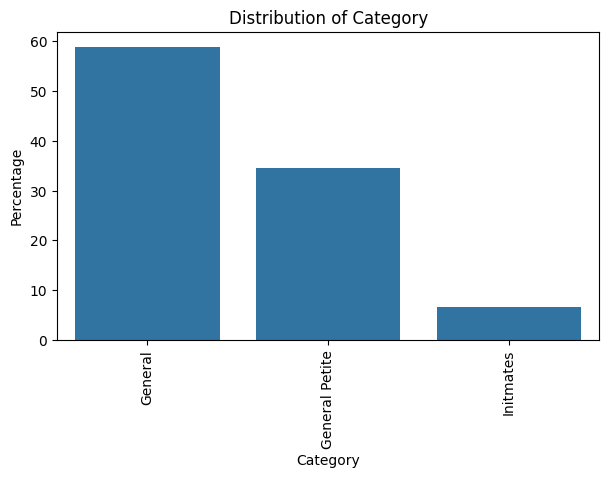

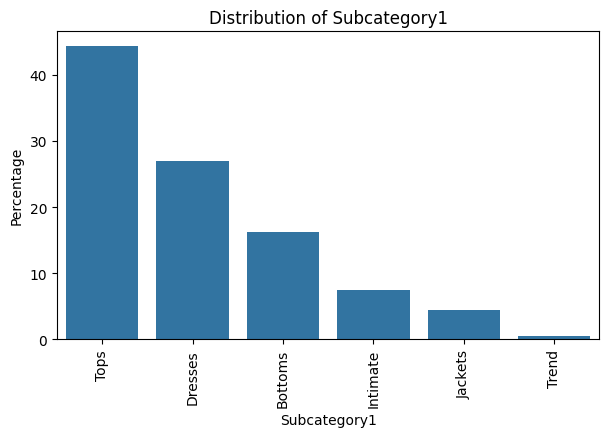

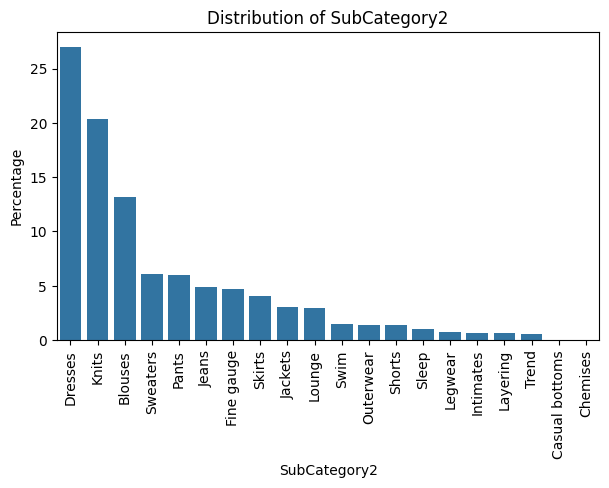

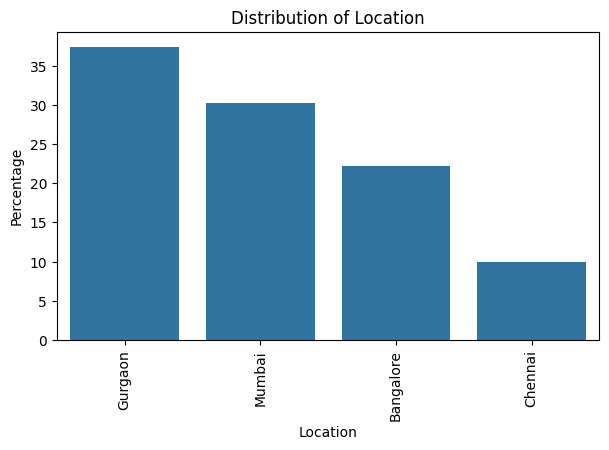

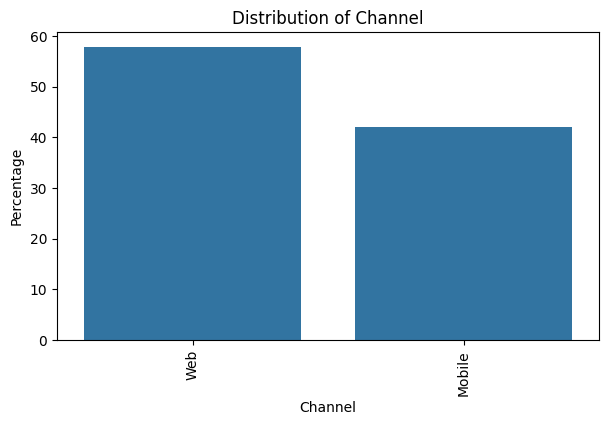

In [13]:


# List of categorical columns
categorical_columns = ['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel']



# Create bar charts and calculate proportions for each categorical variable
for column in categorical_columns:
    # Count the frequency of each category
    category_counts = df[column].value_counts()

    # Calculate proportions (percentages)
    category_proportions = category_counts / len(df) * 100

    # Plot a bar chart
    plt.figure(figsize=(7, 4))
    sns.barplot(x=category_proportions.index, y=category_proportions.values)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()


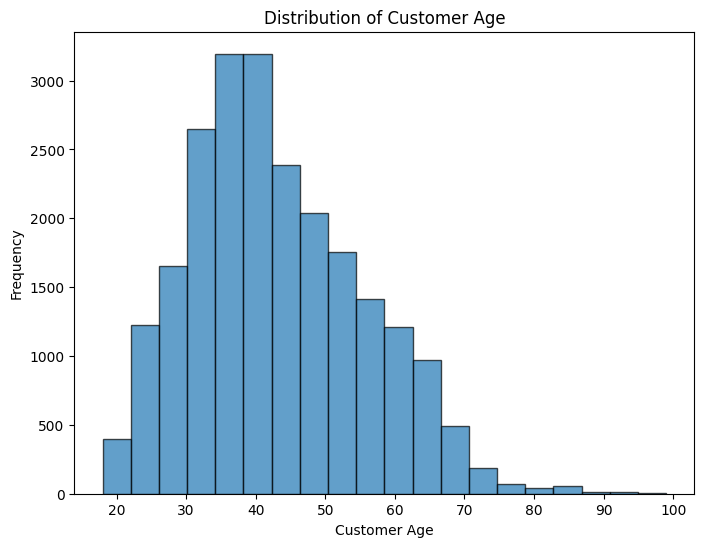

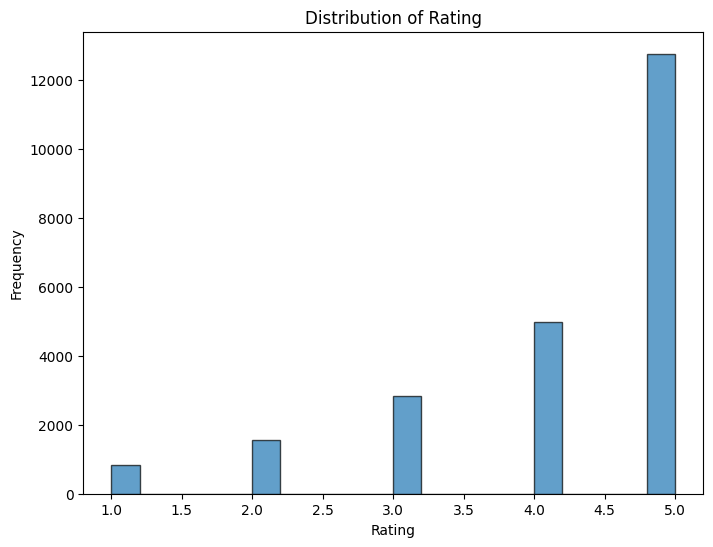

In [14]:
# Plotting for Numerical columns:

numerical_columns = ['Customer Age', 'Rating']

# Creating histograms for each numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()






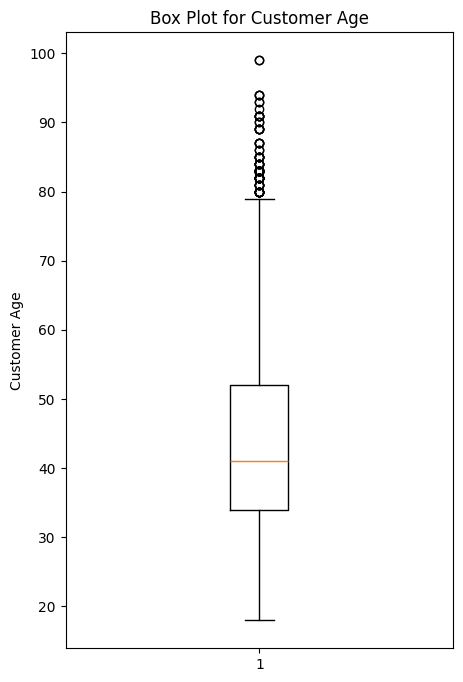

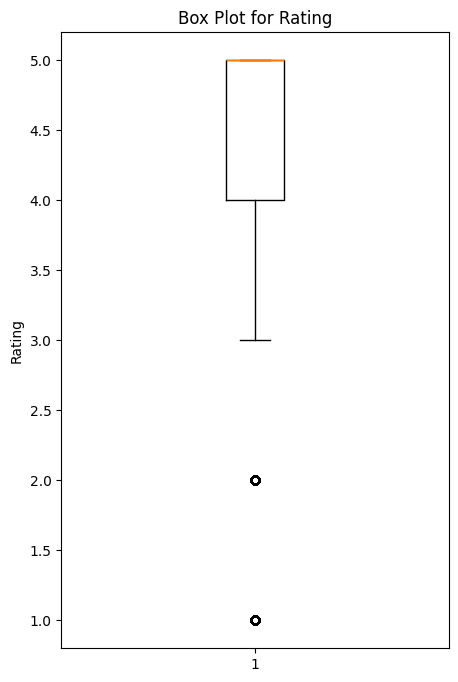

In [15]:
# Use box plots to identify outliers


for column in numerical_columns:
    plt.figure(figsize=(5, 8))
    plt.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

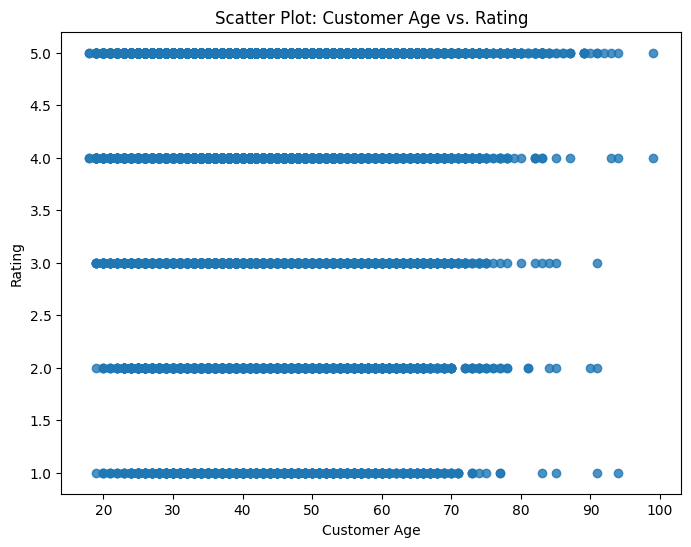

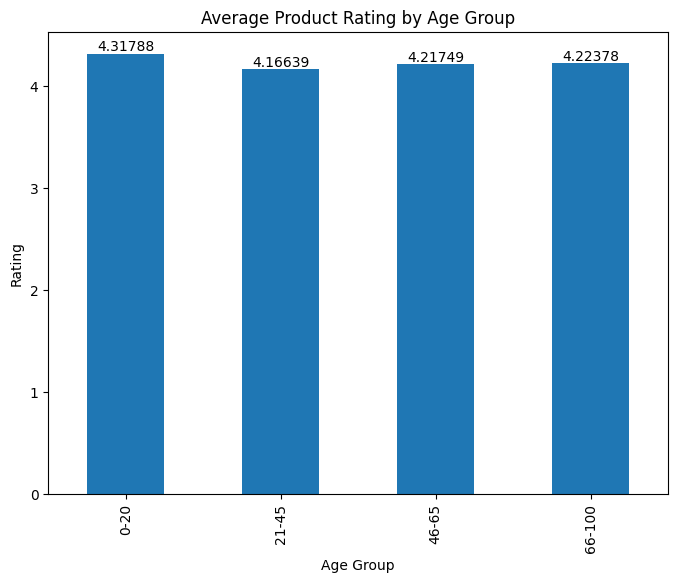

In [16]:
# Plotting the relationship between 'Customer Age' and 'Rating'

plt.figure(figsize=(8, 6))
plt.scatter(df['Customer Age'], df['Rating'], alpha=0.8)
plt.title('Scatter Plot: Customer Age vs. Rating')
plt.xlabel('Customer Age')
plt.ylabel('Rating')
plt.show()


# Calculating Mean rating for each age group:
bins = [0,20,45,65,100]
labels = ['0-20','21-45','46-65','66-100']
df['Age Group']=pd.cut(df['Customer Age'],bins=bins,labels=labels)


# Plotting "Average Rating by Age group."
mean_ratings = df.groupby('Age Group')['Rating'].mean()
plt.figure(figsize=(8, 6))
ax = mean_ratings.plot.bar(x='Age Group', y='Rating', legend=False)
ax.bar_label(ax.containers[0])
plt.title('Average Product Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating')
plt.show()

1. From the above chart we can see that the customers of age groups of 0-20 years, have given the highest of average ratings.

In [17]:
correlation=df['Customer Age'].corr(df['Rating'])

print(f'Correlation coefficient: {correlation}')


Correlation coefficient: 0.028518403303556917


In [18]:
df['Recommend Flag'].value_counts()

,count
Recommend Flag,
1,18821
0,4133


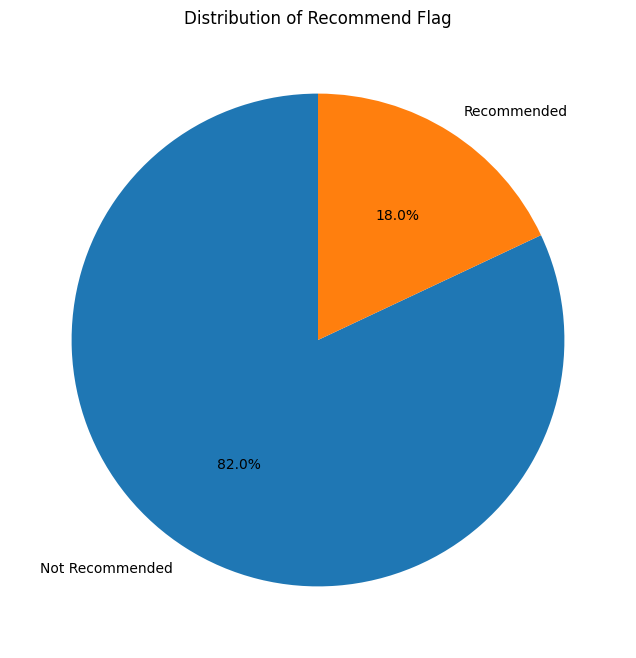

In [19]:
# Create a pie chart for the distribution of 'Recommend Flag'


recommend_counts = df['Recommend Flag'].value_counts()
labels = ['Not Recommended', 'Recommended']
plt.figure(figsize=(8, 8))
plt.pie(recommend_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recommend Flag')
plt.show()



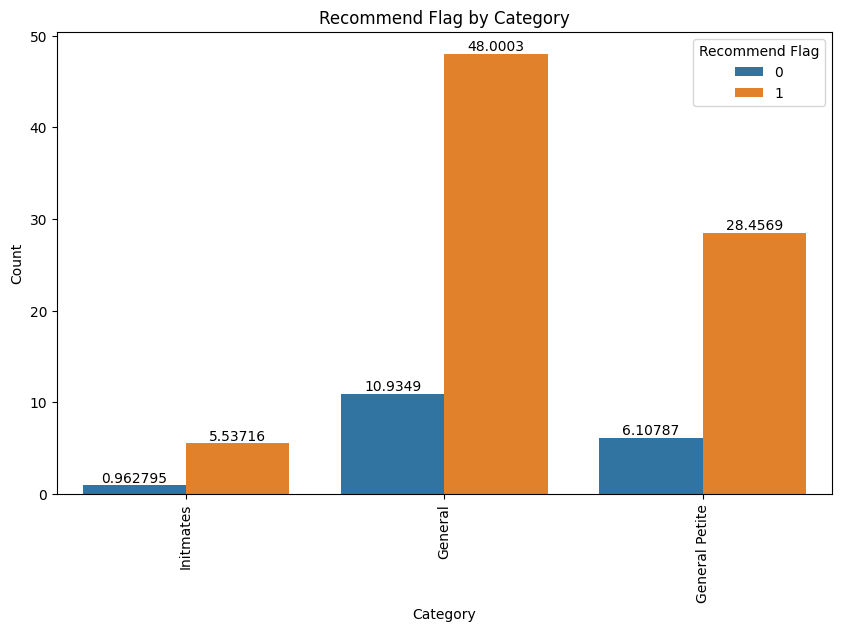

In [20]:
# Explore the relationship between 'Recommend Flag' and 'Category'

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Category', hue='Recommend Flag',stat = 'percent') # stat = 'percent' can be added, to get percent distribution
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Recommend Flag by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Text Mining:**

   - Combine Review Title and Review Text into a single text field.

In [21]:
df['Combined Review'] = df['Review Title'].fillna('') + ' ' + df['Review Text'].fillna('')

# we can fill any potential missing values in 'Review Title' or 'Review Text' with empty strings ('').

# Display the DataFrame with the new column
display(df[['Review Title', 'Review Text', 'Combined Review']])


,Review Title,Review Text,Combined Review
0,Not Available,Absolutely wonderful - silky and sexy and comf...,Not Available Absolutely wonderful - silky and...
1,Not Available,Love this dress! it's sooo pretty. i happene...,Not Available Love this dress! it's sooo pret...
2,Some major design flaws,I had such high hopes for this dress and reall...,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...","My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,Flattering shirt This shirt is very flattering...
...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,Great dress for many occasions I was very happ...
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",Wish it was made of cotton It reminds me of ma...
23483,"Cute, but see through","This fit well, but the top was very see throug...","Cute, but see through This fit well, but the t..."
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,"Very cute dress, perfect for summer parties an..."


#### Text Preprocessing
1. Lower case
2. Remove stop words, punctuations, special characters
3. Remove unique data (such as ID, orderID, Date, etc)
4. TOKENIZATION
5. Lemmatization

In [22]:
df

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Age Group,Combined Review
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Not Available,Absolutely wonderful - silky and sexy and comf...,4,1,21-45,Not Available Absolutely wonderful - silky and...
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Not Available,Love this dress! it's sooo pretty. i happene...,5,1,21-45,Not Available Love this dress! it's sooo pret...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,46-65,Some major design flaws I had such high hopes ...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,46-65,"My favorite buy! I love, love, love this jumps..."
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,46-65,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,21-45,Great dress for many occasions I was very happ...
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,46-65,Wish it was made of cotton It reminds me of ma...
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,21-45,"Cute, but see through This fit well, but the t..."
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,21-45,"Very cute dress, perfect for summer parties an..."


- Tokenization: Split text into words or phrases.

In [23]:
# Creating a function, that will clean the df words.

# Using below function, we perform
# 1. remove stop words
# 2. remove any special characters
# 3. remove any punctuations
# 4. LEMMATIZATION

def text_cleaner(t):
  special_char = '!@#$%^&*()_+`~-='
  doc = nlp(t)
  clean_text = ''
  for token in doc:
    if (not token.is_stop) and (not token.is_punct) and (str(token) not in special_char):
      clean_text = clean_text.strip()
      clean_text = clean_text + ' ' + str(token.lemma_).lower()
  return clean_text


In [24]:
!pip install pandarallel
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True,nb_workers=8)


df['clean_text'] = df['Combined Review'].parallel_apply(text_cleaner)

df

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 3.9 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16713 sha256=52918736cfb81fee87e7416565520ea2d12471d637df0fe4cafead6813c6e8d3
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Age Group,Combined Review,clean_text
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Not Available,Absolutely wonderful - silky and sexy and comf...,4,1,21-45,Not Available Absolutely wonderful - silky and...,available absolutely wonderful silky sexy comf...
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Not Available,Love this dress! it's sooo pretty. i happene...,5,1,21-45,Not Available Love this dress! it's sooo pret...,available love dress sooo pretty happen find s...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,46-65,Some major design flaws I had such high hopes ...,major design flaw high hope dress want work in...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,46-65,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,46-65,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering adjustable t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,21-45,Great dress for many occasions I was very happ...,great dress occasion happy snag dress great pr...
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,46-65,Wish it was made of cotton It reminds me of ma...,wish cotton remind maternity clothe soft stret...
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,21-45,"Cute, but see through This fit well, but the t...",cute fit work glad able try store order online...
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,21-45,"Very cute dress, perfect for summer parties an...",cute dress perfect summer party buy dress wedd...


In [25]:
df.clean_text

,clean_text
0,available absolutely wonderful silky sexy comf...
1,available love dress sooo pretty happen find s...
2,major design flaw high hope dress want work in...
3,favorite buy love love love jumpsuit fun flirt...
4,flattering shirt shirt flattering adjustable t...
...,...
23481,great dress occasion happy snag dress great pr...
23482,wish cotton remind maternity clothe soft stret...
23483,cute fit work glad able try store order online...
23484,cute dress perfect summer party buy dress wedd...


In [26]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt



In [ ]:
# pd.DataFrame(token_freq.items(), columns=['Token', 'Frequency'])

In [29]:
# Categorize reviews as positive (e.g., Rating >= 4 or Recommend Flag == 1) and negative

positive_reviews = df[df['Rating'] >= 4]  # we can choose the criteria you prefer
negative_reviews = df[df['Rating'] < 4]



In [30]:
# Calculate word frequency in positive and negative reviews


positive_reviews_tokens = []
for doc in positive_reviews['clean_text']:
    positive_reviews_tokens.extend([token.text for token in nlp(doc)])
positive_reviews_tokens_freq = Counter(positive_reviews_tokens)



negative_reviews_tokens = []
for doc in negative_reviews['clean_text']:
    negative_reviews_tokens.extend([token.text for token in nlp(doc)])
negative_reviews_tokens_freq = Counter(negative_reviews_tokens)


In [31]:
# Get the most frequent words (e.g., top 10)

top_positive_words = pd.DataFrame(positive_reviews_tokens_freq.items(), columns=['Token', 'Frequency'])
top_negative_words = pd.DataFrame(negative_reviews_tokens_freq.items(), columns=['Token', 'Frequency'])



In [32]:
top_positive_words=top_positive_words.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
top_positive_words[:10]

,Token,Frequency
0,dress,10854
1,love,10352
2,fit,9350
3,wear,8624
4,size,8292
5,great,7033
6,look,6499
7,color,6036
8,like,5448
9,perfect,4294


In [33]:
top_negative_words=top_negative_words.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
top_negative_words[:10]

,Token,Frequency
0,look,2993
1,dress,2873
2,like,2529
3,fit,2426
4,size,2127
5,love,1903
6,fabric,1701
7,wear,1631
8,small,1573
9,color,1489


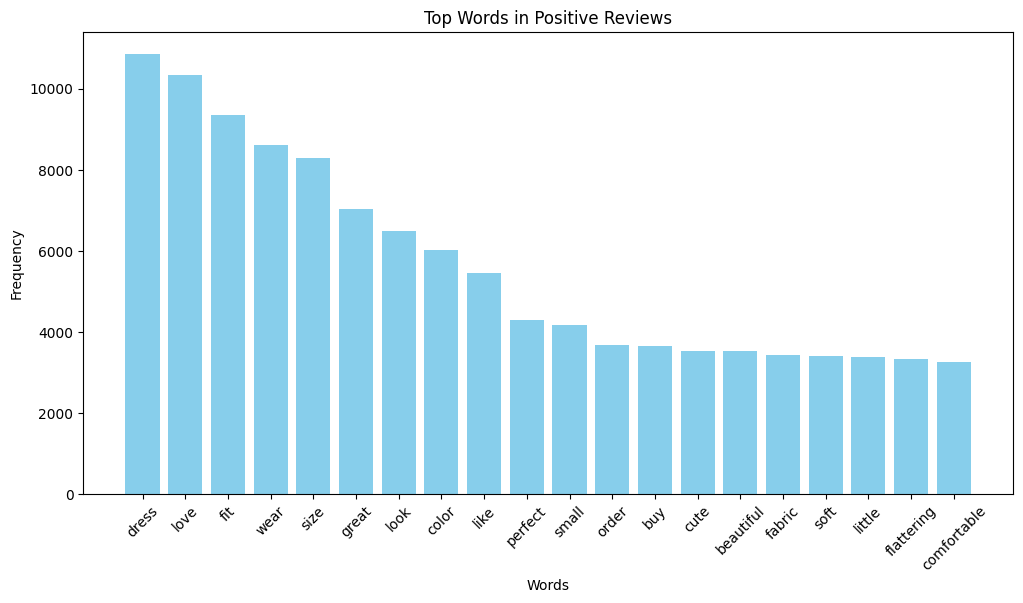

In [34]:
# Plot word frequency for positive reviews

words = top_positive_words['Token'][:20]
frequencies = top_positive_words['Frequency'][:20]


plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




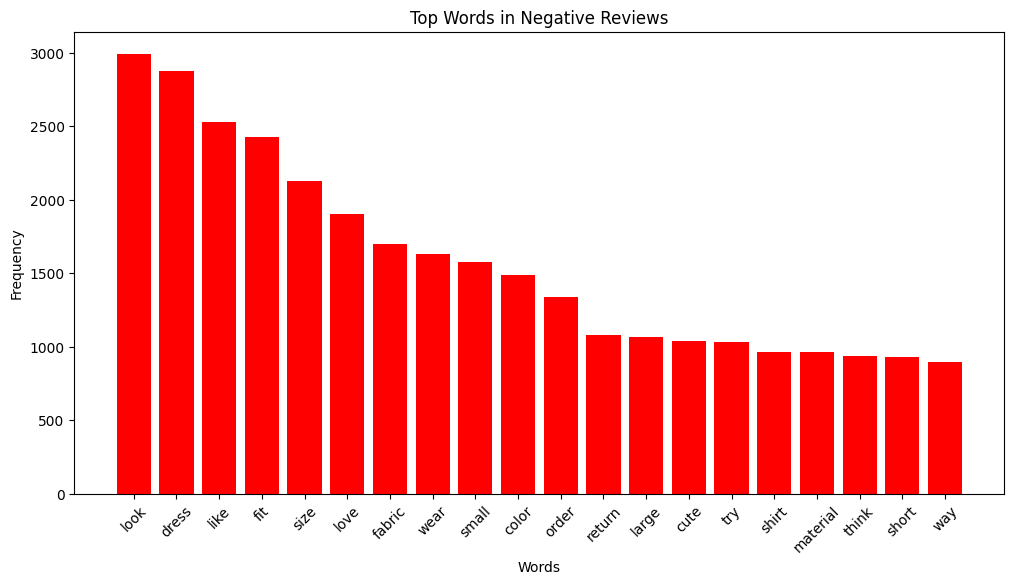

In [35]:
# Plot word frequency for negative reviews

words = top_negative_words['Token'][:20]
frequencies = top_negative_words['Frequency'][:20]


plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='red')
plt.title('Top Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Word Cloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.4 MB/s eta 0:00:00


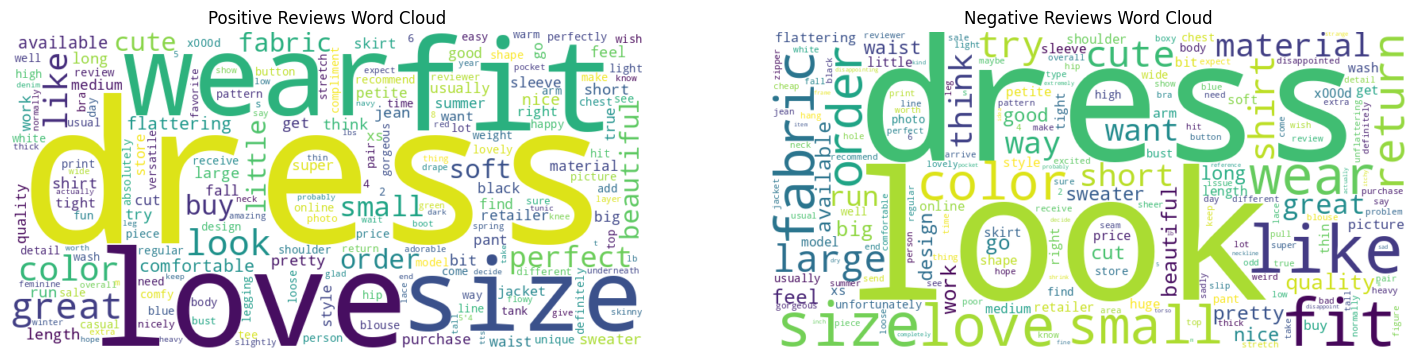

In [36]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# positive_reviews = df[df['Rating'] >= 4]
# negative_reviews = df[df['Rating'] < 4]

# # Join tokens into a single string for positive and negative reviews
# positive_text = ' '.join(' '.join(tokens) for tokens in positive_reviews['Lemmatized Tokens'])
# negative_text = ' '.join(' '.join(tokens) for tokens in negative_reviews['Lemmatized Tokens'])

# Create word clouds for positive and negative reviews
positive_frequencies = dict(zip(top_positive_words['Token'], top_positive_words['Frequency']))
negative_frequencies = dict(zip(top_negative_words['Token'], top_negative_words['Frequency']))

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_frequencies)

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_frequencies)


# Plot the word clouds
plt.figure(figsize=(18, 10))

plt.subplot(121)  # Subplot for positive word cloud
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(122)  # Subplot for negative word cloud
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


## Sentiment Analysis:**
   


### Conduct sentiment analysis using pre-trained models or libraries like VADER.

In [37]:
!pip install textblob
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')  # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 8.3 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:

# Define a function to analyze sentiment using TextBlob

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [41]:
sentiment_analysis = df[['Review Title','Review Text']]

In [43]:

pandarallel.initialize(progress_bar=True,nb_workers=16)

df['Sentiment_TextBlob'] = df['Combined Review'].parallel_apply(analyze_sentiment_textblob)


INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [44]:
# Initializing the VADER sentiment analysis
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    # Classify sentiment as positive, negative, or neutral based on the compound score
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [45]:
# Apply using parallel apply, for efficient use of resources:
pandarallel.initialize(progress_bar=True,nb_workers=16)

df['Sentiment_VADER'] = df['Combined Review'].parallel_apply(analyze_sentiment_vader)


INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22954 entries, 0 to 23485
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Product ID          22954 non-null  int64   
 1   Category            22954 non-null  object  
 2   Subcategory1        22954 non-null  object  
 3   SubCategory2        22954 non-null  object  
 4   Location            22954 non-null  object  
 5   Channel             22954 non-null  object  
 6   Customer Age        22954 non-null  int64   
 7   Review Title        22954 non-null  object  
 8   Review Text         22954 non-null  object  
 9   Rating              22954 non-null  int64   
 10  Recommend Flag      22954 non-null  int64   
 11  Age Group           22954 non-null  category
 12  Combined Review     22954 non-null  object  
 13  clean_text          22954 non-null  object  
 14  Sentiment_TextBlob  22954 non-null  object  
 15  Sentiment_VADER     22954 non-null  objec

- Compute sentiment scores for each review.

In [48]:
df['Sentiment_TextBlob'].value_counts()

,count
Sentiment_TextBlob,
Positive,21326
Negative,1578
Neutral,50


In [49]:
df['Sentiment_VADER'].value_counts()

,count
Sentiment_VADER,
Positive,20898
Negative,1531
Neutral,525


Sentiment analysis, also known as opinion mining, is the process of determining the sentiment or emotional tone expressed in a piece of text, such as a review, tweet, or article. Sentiment analysis can help identify whether the sentiment in the text is positive, negative, or neutral, and sometimes even quantify the sentiment on a numerical scale.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool designed for text written in English. It is widely used for sentiment analysis in social media, customer reviews, and other text data. VADER analyzes text to determine the emotional tone conveyed by words and phrases, and it assigns a polarity score to each piece of text.

Here's how VADER sentiment analysis works:

Lexicon-Based Analysis: VADER relies on a predefined lexicon (dictionary) of words and phrases. Each word in the lexicon is assigned a polarity score, indicating how positive or negative the word is. The lexicon also contains words and phrases that convey neutrality, intensity, and other sentiment-related features.

Rule-Based Scoring: VADER uses rules to interpret the sentiment of text, taking into account the context and positioning of words in a sentence. It looks for patterns, intensifiers, negations, and other linguistic features to refine the sentiment analysis.

Polarity Score: For each piece of text, VADER calculates a compound polarity score that summarizes the overall sentiment. The score typically ranges from -1 (most negative) to 1 (most positive), with 0 indicating a neutral sentiment. This compound score provides a quantitative measure of sentiment.

Sentiment Classification: VADER classifies text into categories like positive, negative, or neutral based on the polarity score. The thresholds for classification can be adjusted to suit the specific analysis.

Sentiment Intensity: VADER can also provide an indication of sentiment intensity, helping differentiate between weak and strong sentiments.

VADER is especially useful for sentiment analysis in short text data, such as tweets or customer reviews, as it considers the context and semantics of text. It's a valuable tool for businesses, researchers, and organizations looking to gauge public sentiment in various forms of textual data.

To use VADER for sentiment analysis in Python, you can employ the NLTK library, the TextBlob library, or the VADERSentiment library, among others, depending on your preferences and requirements.

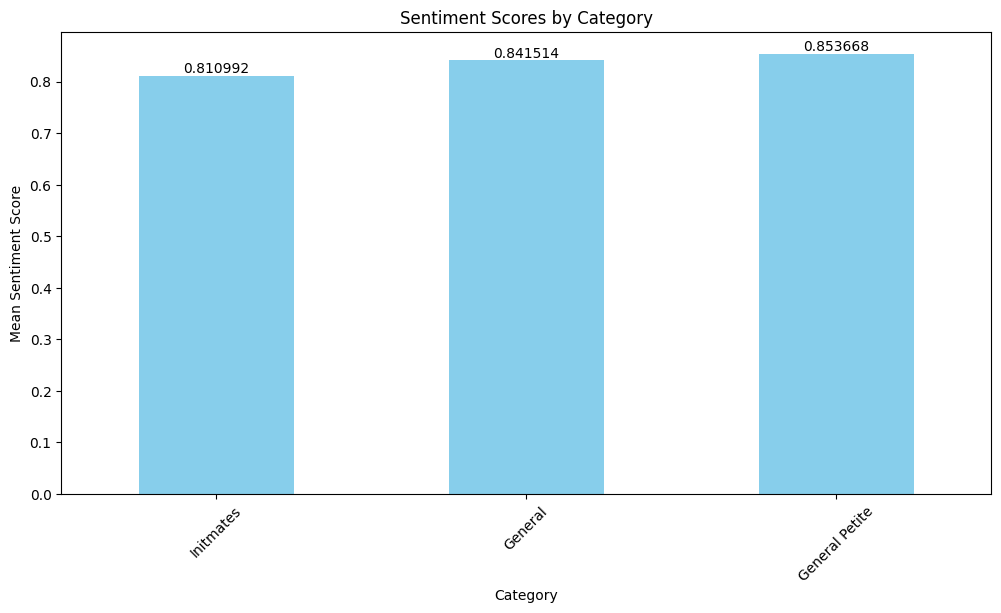

In [52]:
import matplotlib.pyplot as plt

sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_VADER_numeric'] = df['Sentiment_VADER'].map(sentiment_mapping)

# Group by Category and calculate mean sentiment score
category_sentiment = df.groupby('Category')['Sentiment_VADER_numeric'].mean()


# Plot sentiment scores by category using a bar plot
plt.figure(figsize=(12, 6))
ax=category_sentiment.sort_values().plot(kind='bar', color='skyblue')
plt.title('Sentiment Scores by Category')
ax.bar_label(container=ax.containers[0])
plt.xlabel('Category')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.show()


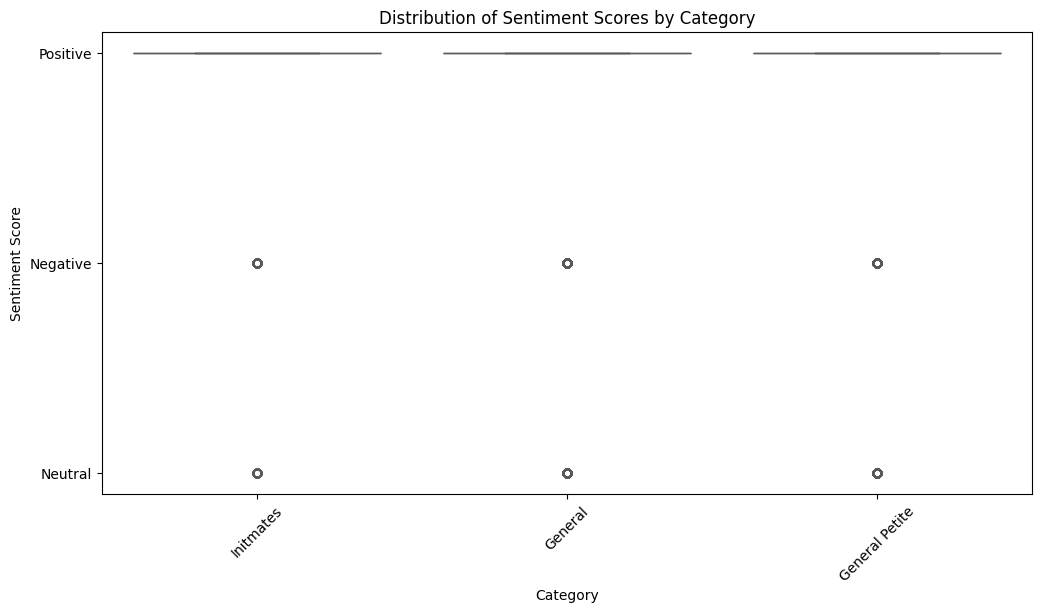

In [53]:

# Create a box plot to visualize the distribution of sentiment scores by category

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Sentiment_VADER', palette='Set2')
plt.title('Distribution of Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


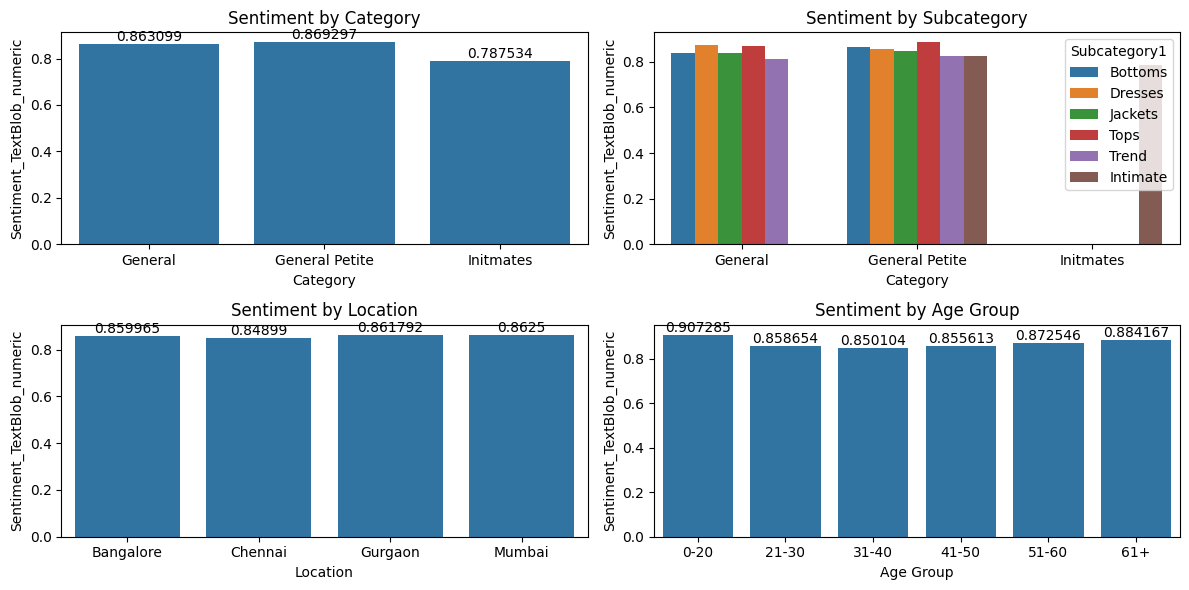

In [58]:

# 1. Aggregate sentiment scores by category
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_TextBlob_numeric'] = df['Sentiment_TextBlob'].map(sentiment_mapping)

category_sentiment = df.groupby('Category')['Sentiment_TextBlob_numeric'].mean().reset_index()

# 2. Aggregate sentiment scores by subcategories
subcategory_sentiment = df.groupby(['Category', 'Subcategory1'])['Sentiment_TextBlob_numeric'].mean().reset_index()

# 3. Aggregate sentiment scores by location
location_sentiment = df.groupby('Location')['Sentiment_TextBlob_numeric'].mean().reset_index()

# 4. Aggregate sentiment scores by age group
# Define age groups or bins
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)

age_sentiment = df.groupby('Age Group')['Sentiment_TextBlob_numeric'].mean().reset_index()

# 5. Visualize sentiment scores
plt.figure(figsize=(12, 6))

plt.subplot(221)
ax1=sns.barplot(x='Category', y='Sentiment_TextBlob_numeric', data=category_sentiment)
ax1.bar_label(ax1.containers[0])
plt.title('Sentiment by Category')

plt.subplot(222)
sns.barplot(x='Category', y='Sentiment_TextBlob_numeric', hue='Subcategory1', data=subcategory_sentiment)
plt.title('Sentiment by Subcategory')

plt.subplot(223)
ax2=sns.barplot(x='Location', y='Sentiment_TextBlob_numeric', data=location_sentiment)
ax2.bar_label(ax2.containers[0])
plt.title('Sentiment by Location')

plt.subplot(224)
ax3=sns.barplot(x='Age Group', y='Sentiment_TextBlob_numeric', data=age_sentiment)
ax3.bar_label(ax3.containers[0])
plt.title('Sentiment by Age Group')

plt.tight_layout()
plt.show()


In [59]:
# Group by Category and calculate mean sentiment score
category_sentiment = df.groupby('Category')['Sentiment_VADER_numeric'].mean()

# Group by Subcategory1 and calculate mean sentiment score
subcategory1_sentiment = df.groupby('Subcategory1')['Sentiment_VADER_numeric'].mean()

# Group by SubCategory2 and calculate mean sentiment score
subcategory2_sentiment = df.groupby('SubCategory2')['Sentiment_VADER_numeric'].mean()

# Group by Location and calculate mean sentiment score
location_sentiment = df.groupby('Location')['Sentiment_VADER_numeric'].mean()

# Group by Customer Age and calculate mean sentiment score
age_group_sentiment = df.groupby('Customer Age')['Sentiment_VADER_numeric'].mean()


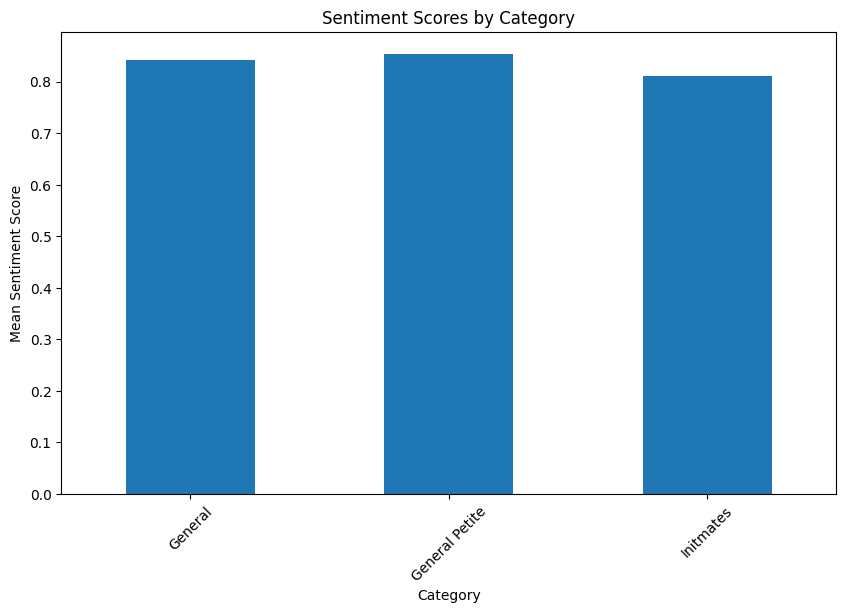

In [61]:

# Plot sentiment scores by category
plt.figure(figsize=(10, 6))
category_sentiment.plot(kind='bar')
plt.title('Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.show()


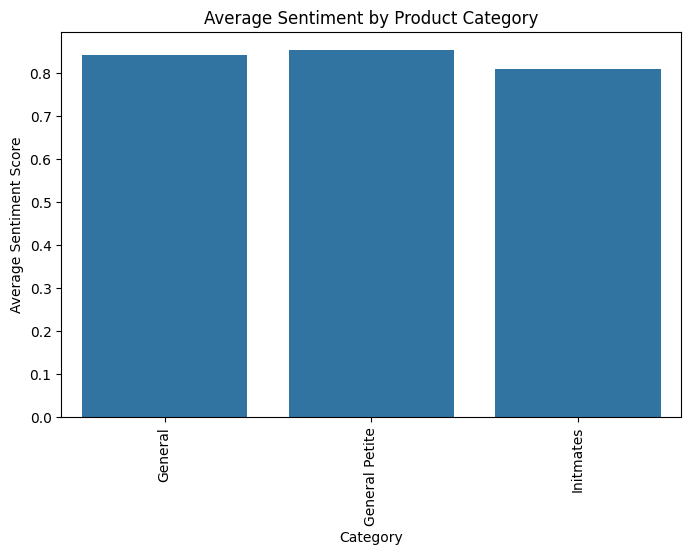

In [68]:
# Analyze sentiment scores by product categories
category_sentiment = df.groupby('Category')['Sentiment_VADER_numeric'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


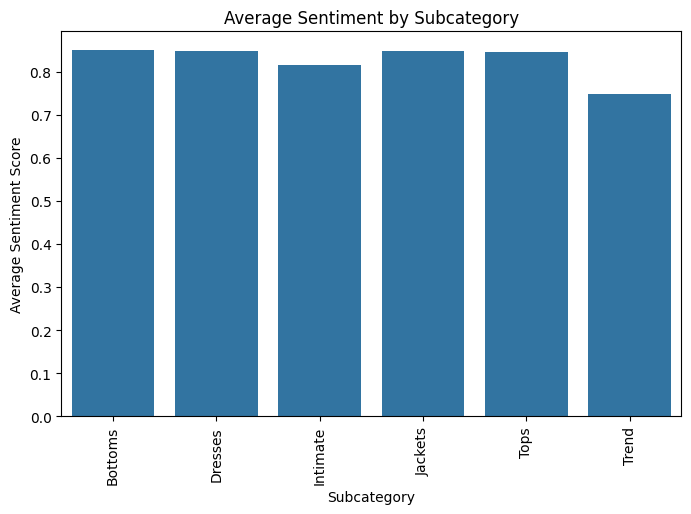

In [69]:
# Analyze sentiment scores by subcategories
subcategory_sentiment = df.groupby('Subcategory1')['Sentiment_VADER_numeric'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=subcategory_sentiment.index, y=subcategory_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.show()

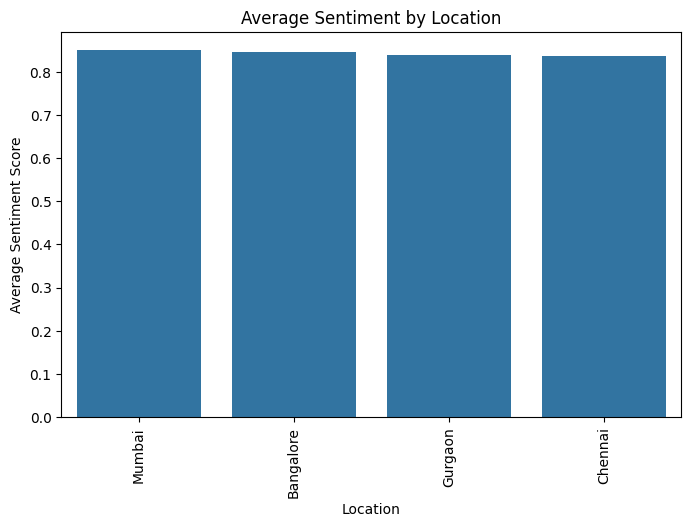

In [70]:
# Analyze sentiment scores by location
location_sentiment = df.groupby('Location')['Sentiment_VADER_numeric'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=location_sentiment.index, y=location_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Location')
plt.xlabel('Location')
plt.ylabel('Average Sentiment Score')
plt.show()

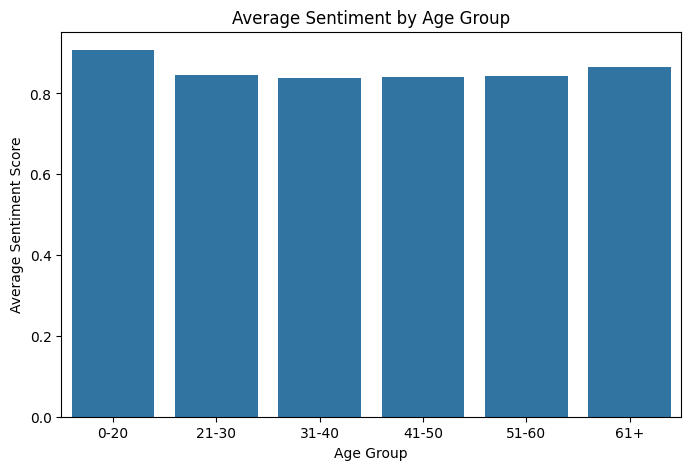

In [71]:
# Analyze sentiment scores by age group
age_group_sentiment = df.groupby('Age Group')['Sentiment_VADER_numeric'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_sentiment.index, y=age_group_sentiment.values)
plt.title('Average Sentiment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sentiment Score')
plt.show()

Correlations Between Factors:

You can analyze correlations between numerical factors, for example, between 'Customer Age' and 'Sentiment_VADER':

In [73]:
correlation = df[['Customer Age', 'Sentiment_VADER_numeric']].corr()
print(correlation)


                         Customer Age  Sentiment_VADER_numeric
Customer Age                 1.000000                 0.006057
Sentiment_VADER_numeric      0.006057                 1.000000


Outlier Analysis:

To identify data points with extreme sentiment scores, you can set a threshold and filter the DataFrame based on sentiment scores. For example, to find rows with extremely positive sentiment:

In [75]:
extreme_positive = df[df['Sentiment_VADER_numeric'] > 0.8]


In [76]:
extreme_positive.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Age Group,Combined Review,clean_text,Sentiment_TextBlob,Sentiment_VADER,Sentiment_VADER_numeric,Sentiment_TextBlob_numeric
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Not Available,Absolutely wonderful - silky and sexy and comf...,4,1,31-40,Not Available Absolutely wonderful - silky and...,available absolutely wonderful silky sexy comf...,Positive,Positive,1,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Not Available,Love this dress! it's sooo pretty. i happene...,5,1,31-40,Not Available Love this dress! it's sooo pret...,available love dress sooo pretty happen find s...,Positive,Positive,1,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,51-60,Some major design flaws I had such high hopes ...,major design flaw high hope dress want work in...,Positive,Positive,1,1
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,41-50,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...,Positive,Positive,1,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,41-50,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering adjustable t...,Positive,Positive,1,1


Reading Customer Reviews from Extreme Sentiment Groups:

You've already filtered extreme positive reviews. You can do the same for extreme negative reviews:

In [78]:
extreme_negative = df[df['Sentiment_VADER_numeric'] < -0.8]


In [79]:
extreme_negative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Age Group,Combined Review,clean_text,Sentiment_TextBlob,Sentiment_VADER,Sentiment_VADER_numeric,Sentiment_TextBlob_numeric
9,1077,General,Dresses,Dresses,Gurgaon,Mobile,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,31-40,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...","fun dress 5""5 125 lb order s petite sure lengt...",Positive,Negative,-1,1
23,1077,General,Dresses,Dresses,Chennai,Web,34,"Like it, but don't love it.",Cute little dress fits tts. it is a little hig...,3,1,31-40,"Like it, but don't love it. Cute little dress ...",like love cute little dress fit tts little hig...,Positive,Negative,-1,1
38,684,Initmates,Intimate,Lounge,Gurgaon,Mobile,36,Not Available,Super cute and comfy pull over. sizing is accu...,5,1,31-40,Not Available Super cute and comfy pull over. ...,available super cute comfy pull sizing accurat...,Positive,Negative,-1,1
61,368,Initmates,Intimate,Intimates,Gurgaon,Web,36,Itchy tags,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,31-40,"Itchy tags 3 tags sewn in, 2 small (about 1'' ...",itchy tag 3 tag sew 2 small 1 long 1 huge 2 x ...,Positive,Negative,-1,1
73,866,General Petite,Tops,Knits,Gurgaon,Web,47,Not Available,I love this top. it is loose and comfortable. ...,4,1,41-50,Not Available I love this top. it is loose and...,available love loose comfortable sheer need ca...,Positive,Negative,-1,1


Comparative Analysis:

You mentioned using different sentiment analysis methods. If you have sentiment scores from different methods, you can compare them:

In [80]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Age Group', 'Combined Review', 'clean_text',
       'Sentiment_TextBlob', 'Sentiment_VADER', 'Sentiment_VADER_numeric',
       'Sentiment_TextBlob_numeric'],
      dtype='object')

#### Create visualizations to illustrate the sentiment analysis results.

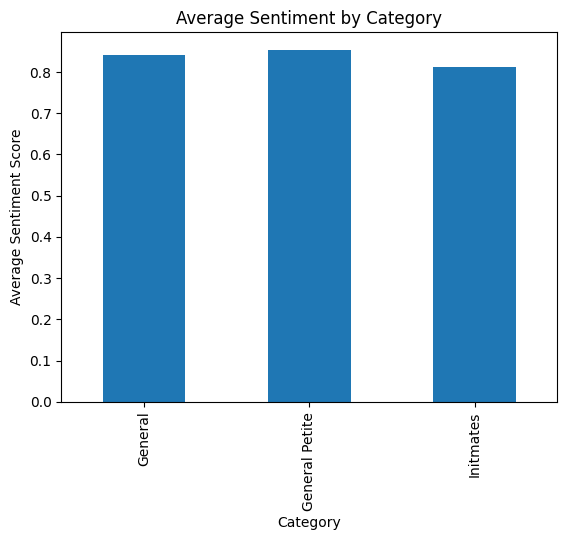

In [81]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize average sentiment by category
category_sentiment = df.groupby('Category')['Sentiment_VADER_numeric'].mean()
category_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


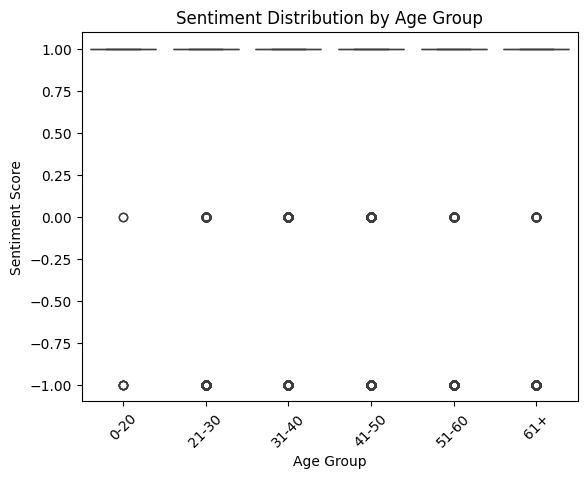

In [82]:
# Create a box plot to visualize sentiment score distribution by age group
import seaborn as sns

sns.boxplot(x='Age Group', y='Sentiment_VADER_numeric', data=df)
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


## Predictive Analytics:
   - Feature engineering: Prepare the text data using techniques like TF-IDF.


In [83]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Age Group', 'Combined Review', 'clean_text',
       'Sentiment_TextBlob', 'Sentiment_VADER', 'Sentiment_VADER_numeric',
       'Sentiment_TextBlob_numeric'],
      dtype='object')

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_features=2000, stop_words='english')

In [ ]:
# Combine 'Review Title' and 'Review Text' columns for text data
# df['Text'] = df['Review Title'] + ' ' + df['Review Text']

In [89]:
# Fit and transform your text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

In [90]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 487258 stored elements and shape (22954, 2000)>

In [92]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,00,00p,0p,10,100,105,107,108,11,110,...,year,yellow,yes,yesterday,yoga,yoke,young,zero,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152127,0.140613
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [93]:

# Concatenate the TF-IDF DataFrame with your original DataFrame

df = pd.concat([df, tfidf_df], axis=1)

In [94]:
df

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,year,yellow,yes,yesterday,yoga,yoke,young,zero,zip,zipper
0,767.0,Initmates,Intimate,Intimates,Mumbai,Mobile,33.0,Not Available,Absolutely wonderful - silky and sexy and comf...,4.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1080.0,General,Dresses,Dresses,Bangalore,Mobile,34.0,Not Available,Love this dress! it's sooo pretty. i happene...,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1077.0,General,Dresses,Dresses,Gurgaon,Mobile,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.152127,0.140613
3,1049.0,General Petite,Bottoms,Pants,Chennai,Web,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,847.0,General,Tops,Blouses,Bangalore,Web,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.184419,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


- Data split: Split the dataset into training and testing sets.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23475 entries, 0 to 22948
Columns: 2018 entries, Product ID to zipper
dtypes: category(1), float64(2006), object(11)
memory usage: 361.4+ MB


In [98]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,year,yellow,yes,yesterday,yoga,yoke,young,zero,zip,zipper
0,767.0,Initmates,Intimate,Intimates,Mumbai,Mobile,33.0,Not Available,Absolutely wonderful - silky and sexy and comf...,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1080.0,General,Dresses,Dresses,Bangalore,Mobile,34.0,Not Available,Love this dress! it's sooo pretty. i happene...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1077.0,General,Dresses,Dresses,Gurgaon,Mobile,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152127,0.140613
3,1049.0,General Petite,Bottoms,Pants,Chennai,Web,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,847.0,General,Tops,Blouses,Bangalore,Web,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [99]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       ...
       'year', 'yellow', 'yes', 'yesterday', 'yoga', 'yoke', 'young', 'zero',
       'zip', 'zipper'],
      dtype='object', length=2018)

In [100]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
# Assuming you want to predict 'Recommend Flag'
X = df[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location']]
y = df['Recommend Flag']

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18780, 5)
X_test shape: (4695, 5)
y_train shape: (18780,)
y_test shape: (4695,)


In [101]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 18780 entries, 17990 to 16145
Series name: Recommend Flag
Non-Null Count  Dtype  
--------------  -----  
18367 non-null  float64
dtypes: float64(1)
memory usage: 293.4 KB


In [102]:
X = pd.get_dummies(df[['Category', 'Location', 'Age Group']])


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values with an empty string
df['Combined Review'] = df['Combined Review'].fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_text = tfidf_vectorizer.fit_transform(df['Combined Review'])


In [104]:
X = pd.concat([X, pd.DataFrame(X_text.toarray())], axis=1)


In [105]:
# Remove rows with missing values in the target variable 'Recommend Flag'
df = df.dropna(subset=['Recommend Flag'])

# Define X and y after removing missing values
X = df[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location']]
y = df['Recommend Flag']


In [110]:
# Assuming 'Your', 'Selected', 'Feature', 'Columns' are your categorical columns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize the one-hot encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the encoder on your categorical columns
X_encoded = encoder.fit_transform(df[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location']])

# Combine the one-hot encoded features with any other numeric features you might have
# Make sure all columns are in a numeric format
# For example, if you have other numeric features in 'X', concatenate them with 'X_encoded'
X = np.concatenate((X_encoded, X), axis=1)


In [111]:
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(df[['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel', 'Age Group']])


In [112]:


# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Combined Review'])


In [113]:


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Recommend Flag'], test_size=0.2, random_state=42)


In [114]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
clf = LogisticRegression()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


Confusion Matrix:
[[ 468  345]
 [ 106 3672]]
AUC: 0.7737942916750501


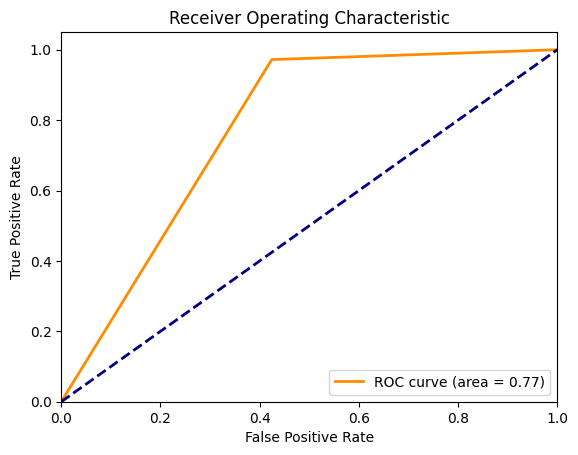

In [115]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
